In [22]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sb
import os

In [8]:
thr_list = ['1000', '1500', '2000', '2500', '3000', '3500', '4000']

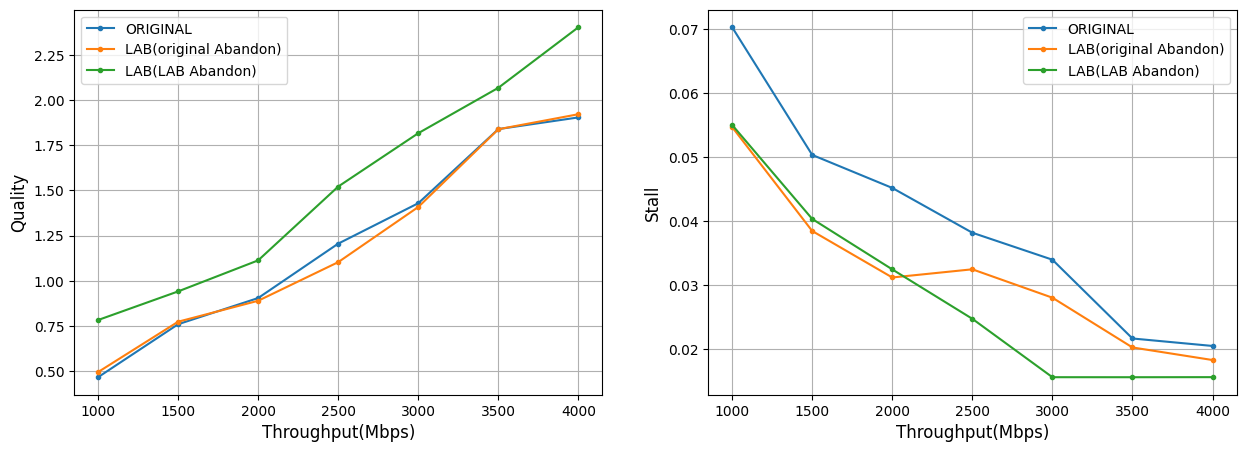

In [9]:
# Total QoE 
dist_list = ['ORIGINAL', 'LAB(original Abandon)', 'LAB(LAB Abandon)']
with open('../notebook/QoE/total.csv', mode='r') as file:
    reader = csv.reader(file, delimiter=';')
    data = [list(map(float, row)) for row in reader]

# idx 0~2 : Quality
# idx 3~5 : Stall
plt.figure(figsize=(15,5))
plt.subplot(121)
Quality = data[0:3]
Stall = data[3:6]
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Quality", fontsize=12)
for i in range(len(Quality)):
    plt.plot(thr_list, Quality[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()
plt.subplot(122)
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Stall", fontsize=12)
for i in range(len(Stall)):
    plt.plot(thr_list, Stall[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()

plt.savefig('QoE_total.pdf', bbox_inches='tight')

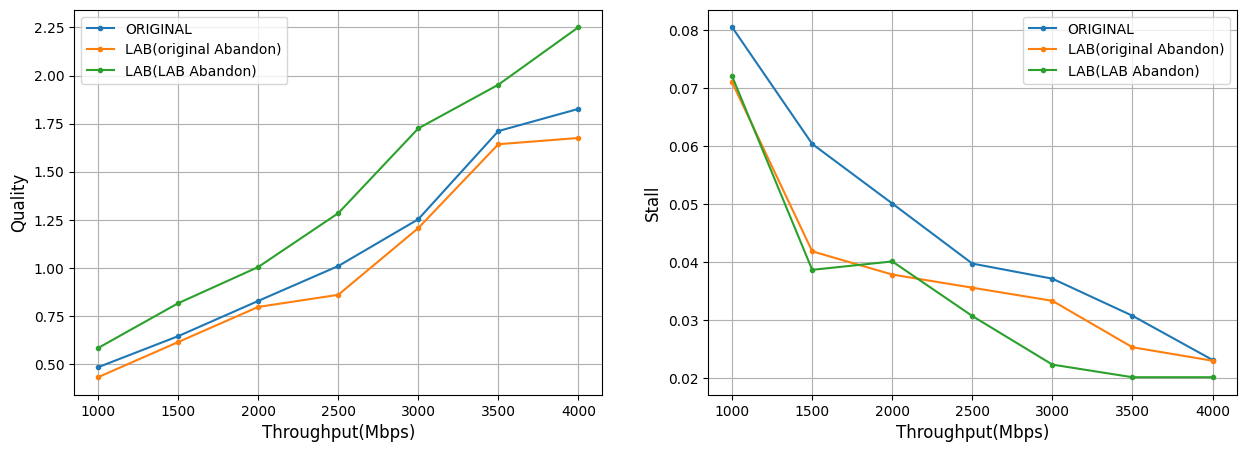

In [10]:
# High Covariance
dist_list = ['ORIGINAL', 'LAB(original Abandon)', 'LAB(LAB Abandon)']
with open('../notebook/QoE/high_covariance.csv', mode='r') as file:
    reader = csv.reader(file, delimiter=';')
    data = [list(map(float, row)) for row in reader]

# idx 0~2 : Quality
# idx 3~5 : Stall
plt.figure(figsize=(15,5))
plt.subplot(121)
Quality = data[0:3]
Stall = data[3:6]
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Quality", fontsize=12)
for i in range(len(Quality)):
    plt.plot(thr_list, Quality[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()
plt.subplot(122)
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Stall", fontsize=12)
for i in range(len(Stall)):
    plt.plot(thr_list, Stall[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()

plt.savefig('QoE_high.pdf', bbox_inches='tight')

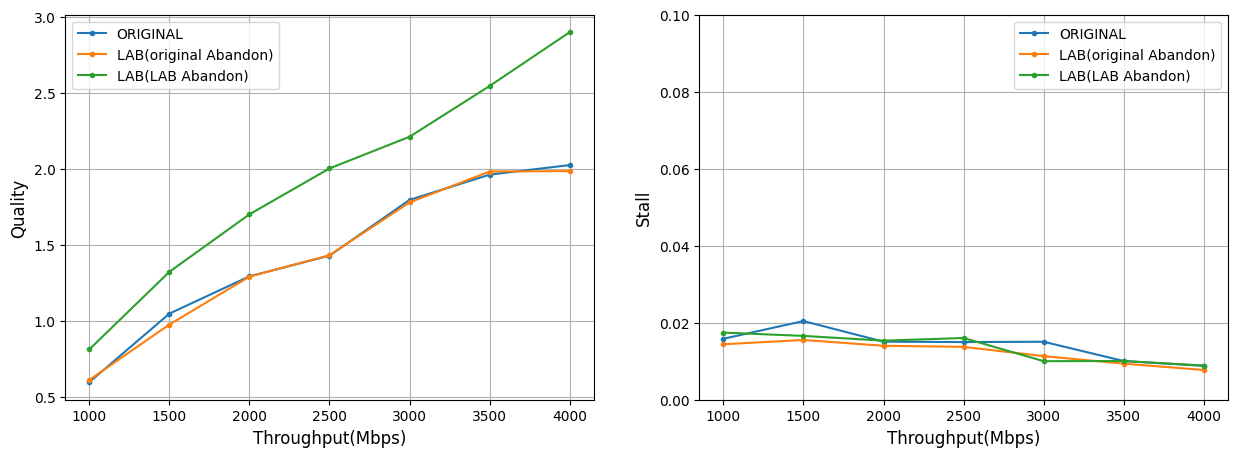

In [11]:
# Low Covariance 
dist_list = ['ORIGINAL', 'LAB(original Abandon)', 'LAB(LAB Abandon)']
with open('../notebook/QoE/low_covariance.csv', mode='r') as file:
    reader = csv.reader(file, delimiter=';')
    data = [list(map(float, row)) for row in reader]

# idx 0~2 : Quality
# idx 3~5 : Stall
plt.figure(figsize=(15,5))
plt.subplot(121)
Quality = data[0:3]
Stall = data[3:6]
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Quality", fontsize=12)
for i in range(len(Quality)):
    plt.plot(thr_list, Quality[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()
plt.subplot(122)
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Stall", fontsize=12)
plt.ylim(0,0.1)
for i in range(len(Stall)):
    plt.plot(thr_list, Stall[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()

plt.savefig('QoE_low.pdf', bbox_inches='tight')

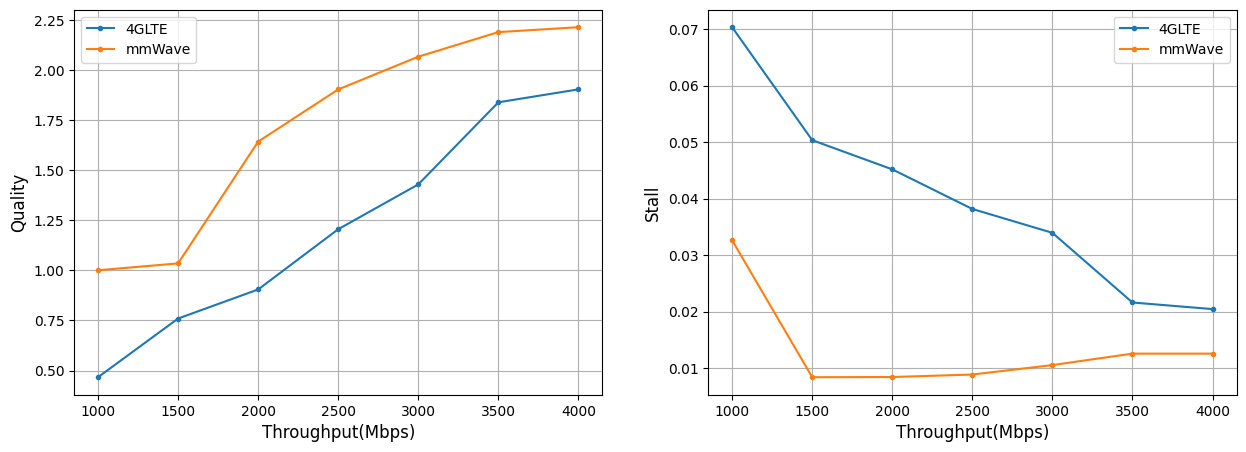

In [14]:
# mmwave & 4g
dist_list = ['4GLTE', 'mmWave']
with open('../notebook/QoE/mmwave_4g.csv', mode='r') as file:
    reader = csv.reader(file, delimiter=';')
    data = [list(map(float, row)) for row in reader]

# idx 0~1 : Quality
# idx 2~3 : Stall
plt.figure(figsize=(15,5))
plt.subplot(121)
Quality = data[0:2]
Stall = data[2:4]
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Quality", fontsize=12)
for i in range(len(Quality)):
    plt.plot(thr_list, Quality[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()
plt.subplot(122)
plt.xlabel("Throughput(Mbps)", fontsize=12)
plt.ylabel("Stall", fontsize=12)
for i in range(len(Stall)):
    plt.plot(thr_list, Stall[i], marker='o', markersize=3)
plt.legend(dist_list)
plt.grid()

plt.savefig('mmwave&4g.pdf', bbox_inches='tight')

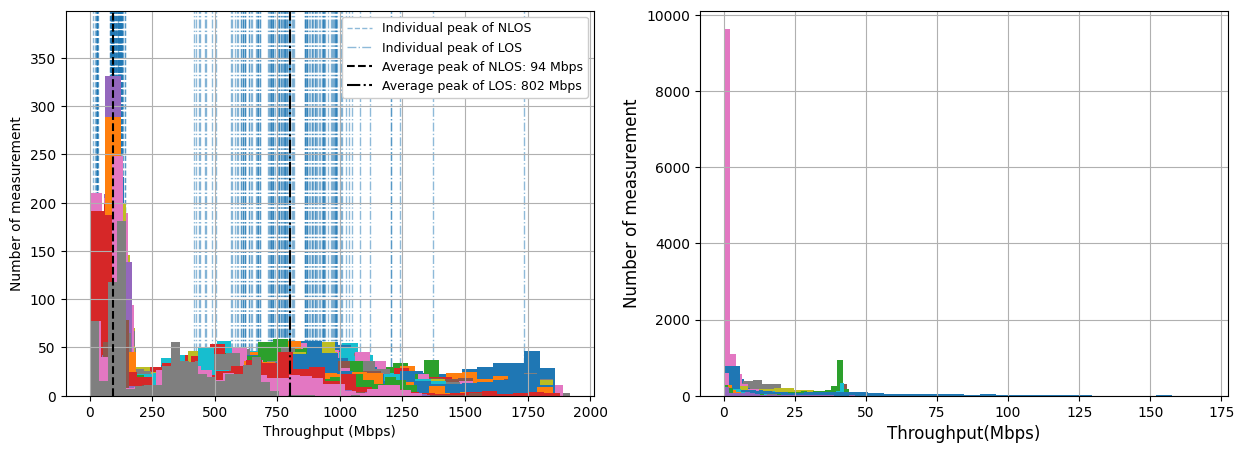

In [25]:
# mmwave&4g trace analysis

#mmwave dataset
df = pd.read_csv('../public_trace/Lumos5g/Lumos5G-v1.0.csv')

#4g dataset
all_traces = {}
for d in os.walk('../public_trace/LTE_MMSys18/Dataset/'):
    for f in d[-1]:
        if f.split('.')[-1] == 'csv':
            path = os.path.join(d[0], f)
            all_traces[path] = pd.read_csv(path)

plt.figure(figsize=(15,5))

#mmwave
plt.subplot(121)
all_los = []
all_nlos = []
all_ave = []
split = []
for i in range(df.iloc[-1]["run_num"]):
    trace = df.loc[df['run_num']==i+1]
    hist = plt.hist(trace['Throughput'], bins=30)
    pivot = np.argmin(np.abs(hist[1]-250))
    
    valleys = sc.signal.find_peaks(-hist[0], distance=hist[0].shape[0]//2)
    split.append(np.mean([hist[1][valleys[0][0]], hist[1][valleys[0][0]+1]]))
    
    peaks = sc.signal.find_peaks(np.concatenate([[0], hist[0]]), distance=hist[0].shape[0]//3)
    peaks = peaks[0] - 1
    # NLOS
    nlos = np.mean([hist[1][peaks[0]], hist[1][peaks[0]+1]])
    # LOS
    los_pos = np.argmax([hist[0][p] for p in peaks[1:]])
    los = hist[1][peaks[los_pos+1]]
  
    all_los.append(los)
    all_nlos.append(nlos)
    all_ave.append(trace['Throughput'].mean())
    if i:
        plt.axvline(nlos, color='C0', linestyle='--', zorder=0, alpha=0.5, linewidth=1)
        plt.axvline(los, color='C0', linestyle='-.', zorder=0, alpha=0.5, linewidth=1)
    else:
        plt.axvline(nlos, color='C0', linestyle='--', zorder=0, alpha=0.5, linewidth=1,\
                    label=f"Individual peak of NLOS")
        plt.axvline(los, color='C0', linestyle='-.', zorder=0, alpha=0.5, linewidth=1,\
                    label=f"Individual peak of LOS")

plt.grid()
plt.ylim(0, 399)
plt.xlabel("Throughput (Mbps)")
plt.ylabel("Number of measurement")
plt.axvline(np.mean(all_nlos), color='k', linestyle='--', linewidth=1.5, \
            label=f"Average peak of NLOS: {int(np.mean(all_nlos))} Mbps")
plt.axvline(np.mean(all_los), color='k', linestyle='-.', linewidth=1.5, \
            label=f"Average peak of LOS: {int(np.mean(all_los))} Mbps")

#plt.legend(bbox_to_anchor=(.5, 1.3), loc='upper center', fontsize=8)
plt.legend(loc='upper right', fontsize=9, framealpha=1)

#4g
plt.subplot(122)
for t in all_traces:
    trace = all_traces[t]['DL_bitrate']
    trace = [i / 1024 for i in trace]
    hist = plt.hist(trace, bins=30)
    plt.ylabel('Number of measurement', fontsize=12)
    plt.xlabel('Throughput(Mbps)', fontsize=12)
    plt.grid()

plt.savefig('peak_los_nlos.pdf', bbox_inches='tight')